In [1]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'
path ='/mnt/t3nfs01/data01/shome/nchernya/local/'
path = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/'

In [2]:
import glob

In [3]:
#files = glob.glob('%s/out_20171130_17*node*_cat[0-9]*_mjj/cat_opt.json' % path)
#files = glob.glob('%s/out_20180420_170901_node_SM_cat[0-9]*_mjj/cat_opt.json' % path)
date="20180628_163555"
#date = '20180604_153820'

files = glob.glob('%s/out_%s_node*_cat*_transformed_mjj/cat_opt.json' %(path,date))

In [4]:
files

['/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat0_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat1_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat2_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat3_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat4_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat5_transformed_mjj/cat_opt.json',
 '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/out_20180628_163555_node_10_cat6_tr

In [5]:
import json 
import numpy as np

summary = { x:[] for x in ['node', 'cat', 'boundaries','ncat','fom','selections']  }

for fil in files:
    toks = fil.split('/')[-2].split('node_')
    name = toks[1].split('_')[0]
    cat = int(toks[1].split('_')[1].replace('cat',''))
    if name == 'SM': name = '0'
    node = int(name)
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['cat'] = cat
        val['boundaries'] = np.array(val['boundaries'])
        val['selections'] = np.array(val['selections']).astype(float)
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [6]:
import pandas as pd
df = pd.DataFrame(summary)

In [7]:
# df.set_index(['ncat','node'],drop=False,inplace=True# )

In [8]:
df.sort_index(inplace=True)
df

,boundaries,cat,fom,ncat,node,selections
0,"[1.01, 0.0]",0,-0.602,1,10,"[-44.679, -28.306]"
1,"[1.01, 0.0]",1,-1.295,1,10,"[-25.0, -25.0]"
2,"[1.01, 0.0]",2,-1.681,1,10,"[-24.517, -44.917]"
3,"[1.01, 0.0]",3,-1.643,1,10,"[-19.108, -21.073]"
4,"[1.01, 0.0]",4,-0.653,1,10,"[-25.382, -31.532]"
5,"[1.01, 0.0]",5,-1.292,1,10,"[-25.0, -25.0]"
6,"[1.01, 0.0]",6,-1.148,1,10,"[-38.102, -24.952]"
7,"[1.01, 0.0]",7,-0.622,1,10,"[-22.423, -11.757]"
8,"[1.01, 0.0]",8,-0.375,1,10,"[-14.102, -40.007]"
9,"[1.01, 0.0]",9,-0.567,1,10,"[-24.886, -44.897]"


In [9]:
df = df.query('fom<0')
df

,boundaries,cat,fom,ncat,node,selections
0,"[1.01, 0.0]",0,-0.602,1,10,"[-44.679, -28.306]"
1,"[1.01, 0.0]",1,-1.295,1,10,"[-25.0, -25.0]"
2,"[1.01, 0.0]",2,-1.681,1,10,"[-24.517, -44.917]"
3,"[1.01, 0.0]",3,-1.643,1,10,"[-19.108, -21.073]"
4,"[1.01, 0.0]",4,-0.653,1,10,"[-25.382, -31.532]"
5,"[1.01, 0.0]",5,-1.292,1,10,"[-25.0, -25.0]"
6,"[1.01, 0.0]",6,-1.148,1,10,"[-38.102, -24.952]"
7,"[1.01, 0.0]",7,-0.622,1,10,"[-22.423, -11.757]"
8,"[1.01, 0.0]",8,-0.375,1,10,"[-14.102, -40.007]"
9,"[1.01, 0.0]",9,-0.567,1,10,"[-24.886, -44.897]"


In [10]:
from sklearn.cluster import KMeans

In [11]:
boundaries = []

# for ncats in [1]:
for row in df['selections']:
    boundaries.append( row )

In [12]:
boundaries = np.array(boundaries)

df['min_mjj'] = boundaries[:,1].ravel().astype(np.float)
df['max_mjj'] = -boundaries[:,0].ravel().astype(np.float)
#boundaries[:,:,1].shape

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [125]:
#df = df.query('min_mjj > -50')
#df = df.query('max_mjj < 50')
#df

In [13]:
df['fom'] = -df['fom']

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
grouped = df.groupby('cat')

In [15]:
df[['node','max_mjj','min_mjj','fom']]

,node,max_mjj,min_mjj,fom
0,10,44.679,-28.306,0.602
1,10,25.000,-25.000,1.295
2,10,24.517,-44.917,1.681
3,10,19.108,-21.073,1.643
4,10,25.382,-31.532,0.653
5,10,25.000,-25.000,1.292
6,10,38.102,-24.952,1.148
7,10,22.423,-11.757,0.622
8,10,14.102,-40.007,0.375
9,10,24.886,-44.897,0.567


In [16]:
len(grouped)

12

In [17]:
tag='newcodev2_Mjj'
pathsave = '/afs/cern.ch/work/n/nchernya/ETH/CMSSW_8_0_28/src/diphotons/Utils/macro/outPlots/plots/%s_%s/'%(date,tag)

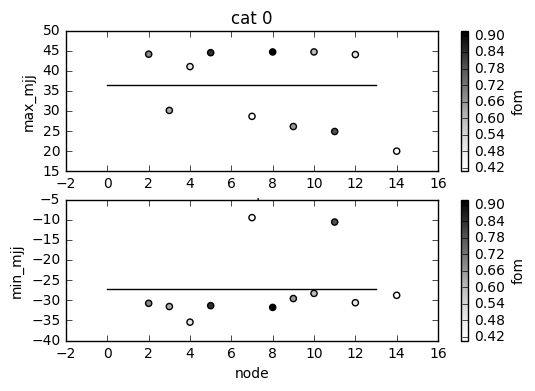

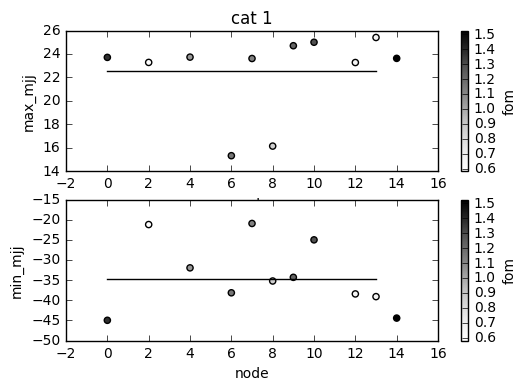

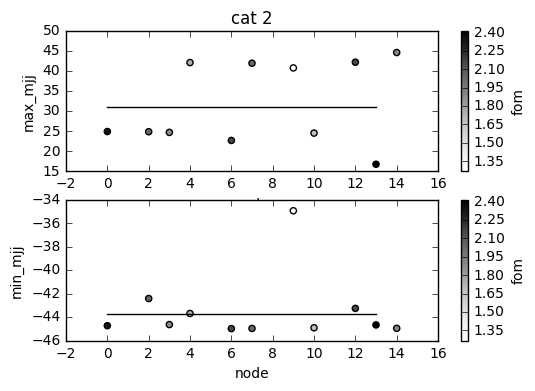

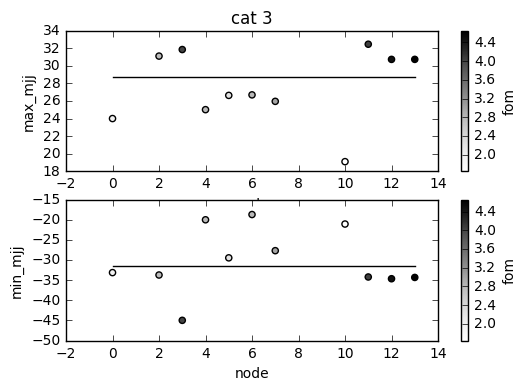

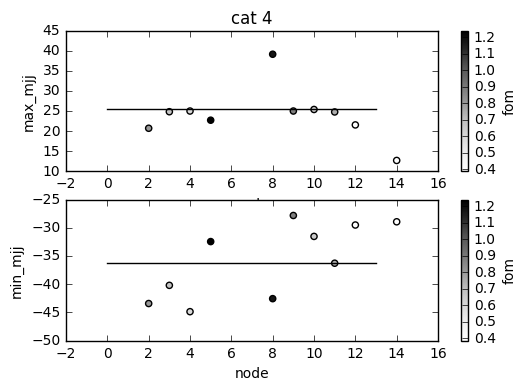

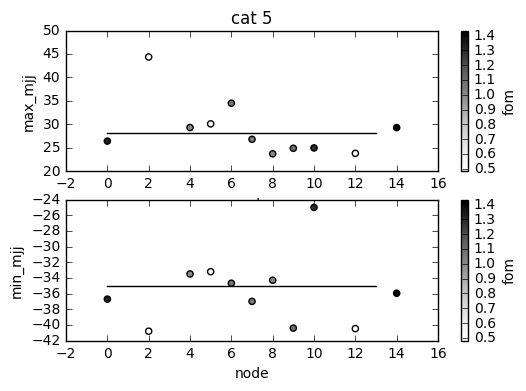

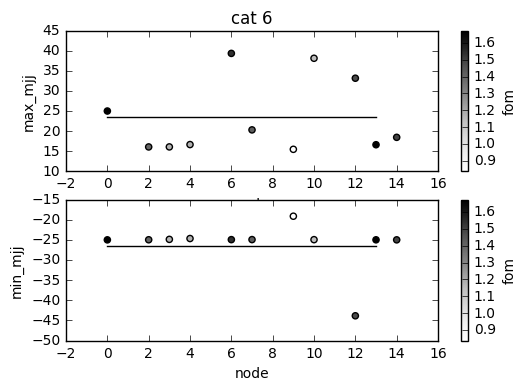

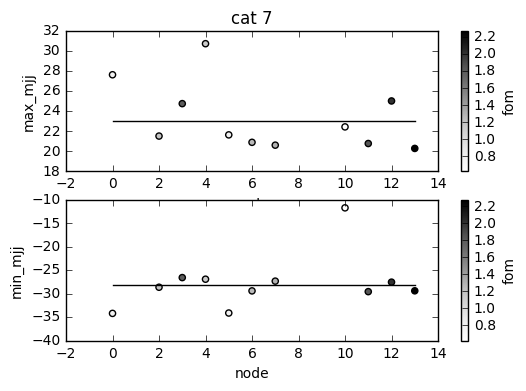

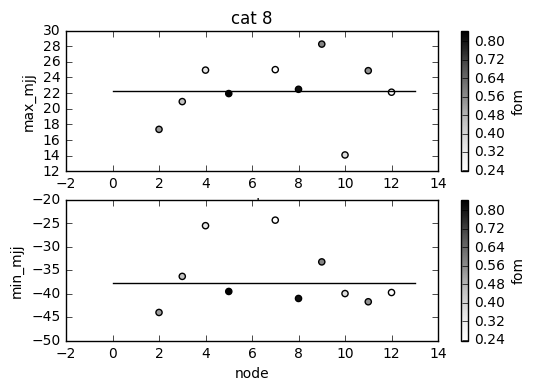

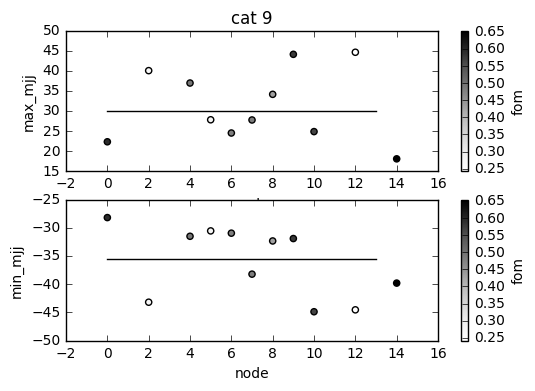

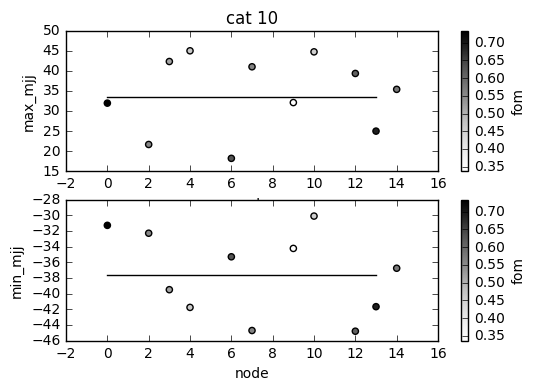

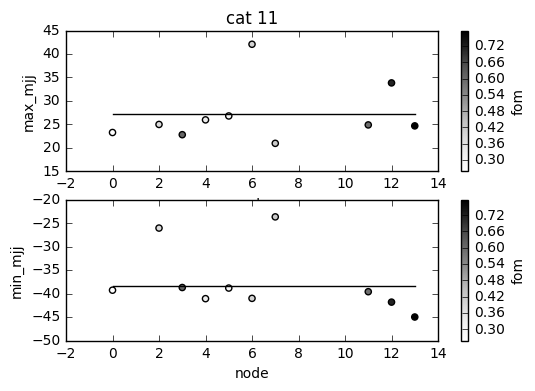

In [19]:
import matplotlib.pyplot as plt

avgs = []

for group in grouped.groups:
    plt.clf()
    grp = grouped.get_group(group)
    min_fom = np.percentile(grp['fom'],20.)
    grp = grp[ grp['fom'] > min_fom ]
    ax = plt.subplot(2,1,1)
    plt.title('cat %d' % group)
    grp.plot.scatter( 'node', 'max_mjj', c='fom', ax=ax)    
    max_avg = (grp['max_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(max_avg,max_avg),'k-')
  #  ax.set_ylim(10,50)
    
    ax=plt.subplot(2,1,2)
    grp.plot.scatter( 'node', 'min_mjj', c='fom', ax=ax)
    min_avg = (grp['min_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(min_avg,min_avg),'k-')

    avgs.append([group,min_avg,max_avg])
    plt.savefig(pathsave+"clusteringMjj_%s_%s_cat%d"%(tag,date,group)+".pdf")

    plt.show()

In [20]:
avgs

[[0, -27.298947595118452, 36.53042555635321],
 [1, -34.67330417064076, 22.586668169600273],
 [2, -43.7807750451577, 31.072694363392152],
 [3, -31.51428557750893, 28.669495459424958],
 [4, -36.303145973819916, 25.54113989157742],
 [5, -35.085028566111475, 28.212392574672002],
 [6, -26.4803419513492, 23.537041140502463],
 [7, -28.216623695233036, 23.024776012233232],
 [8, -37.83927514613989, 22.287360612779686],
 [9, -35.570341996455994, 30.010094900570977],
 [10, -37.621608801955986, 33.518018092909536],
 [11, -38.36947207697134, 27.149295544865087]]

In [21]:
avgs

[[0, -27.298947595118452, 36.53042555635321],
 [1, -34.67330417064076, 22.586668169600273],
 [2, -43.7807750451577, 31.072694363392152],
 [3, -31.51428557750893, 28.669495459424958],
 [4, -36.303145973819916, 25.54113989157742],
 [5, -35.085028566111475, 28.212392574672002],
 [6, -26.4803419513492, 23.537041140502463],
 [7, -28.216623695233036, 23.024776012233232],
 [8, -37.83927514613989, 22.287360612779686],
 [9, -35.570341996455994, 30.010094900570977],
 [10, -37.621608801955986, 33.518018092909536],
 [11, -38.36947207697134, 27.149295544865087]]

In [22]:
avgs = np.array(avgs)
round_to = 1.

In [23]:
rounded = np.round(avgs[:,1:3] / round_to)*round_to

In [24]:
rounded[:,1] = np.vstack( [rounded[:,1],np.ones_like(rounded[:,1])*40] ).min(axis=0)

In [25]:
rounded[0,1]

37.0

In [26]:
rounded+=125
rounded

array([[  98.,  162.],
       [  90.,  148.],
       [  81.,  156.],
       [  93.,  154.],
       [  89.,  151.],
       [  90.,  153.],
       [  99.,  149.],
       [  97.,  148.],
       [  87.,  147.],
       [  89.,  155.],
       [  87.,  159.],
       [  87.,  152.]])

In [154]:
###for 1 node only
#bound = np.round(np.vstack((df['min_mjj']+125,df['max_mjj']+125)),0)
#bound

In [27]:
info_file = open(pathsave+"info_Mjj_%s_%s.txt"%(tag,date),"w") 
info_file.write(",".join([str(rounded[i][0]) for i in range(0,len(rounded))]))
info_file.write("\n")
info_file.write(",".join([str(rounded[i][1]) for i in range(0,len(rounded))]))
info_file.close()